### Importing all libraries


In [4]:
#data pre-processing libaries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split

#model libraries
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier, VotingClassifier

#evaluation libaries
from sklearn.metrics import accuracy_score, precision_score, recall_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt

# Function to plot a confusion matrix
def plot_confusion_matrix(confusion_matrix, class_names, title=None):
    plt.figure(figsize=(8, 6))
    plt.imshow(confusion_matrix, interpolation='nearest', cmap=plt.get_cmap('Blues'))
    plt.title(title)
    plt.colorbar()
    
    tick_marks = np.arange(len(class_names))
    plt.xticks(tick_marks, class_names, rotation=45)
    plt.yticks(tick_marks, class_names)

    for i in range(len(class_names)):
        for j in range(len(class_names)):
            plt.text(j, i, format(confusion_matrix[i, j], 'd'),
                     horizontalalignment="center", color="white" if confusion_matrix[i, j] > confusion_matrix.max() / 2 else "black")

    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.tight_layout()

***


### Data Pre-Processing


In [5]:
# extract dataset csv file using Pandas
untouched_data = pd.read_csv("Liver_Patient_Dataset.csv", encoding = "latin1")

#display the dataset
untouched_data

,Age of the patient,Gender of the patient,Total Bilirubin,Direct Bilirubin,Alkphos Alkaline Phosphotase,Sgpt Alamine Aminotransferase,Sgot Aspartate Aminotransferase,Total Protiens,ALB Albumin,A/G Ratio Albumin and Globulin Ratio,Result
0,65.0,Female,0.7,0.1,187.0,16.0,18.0,6.8,3.3,0.90,1
1,62.0,Male,10.9,5.5,699.0,64.0,100.0,7.5,3.2,0.74,1
2,62.0,Male,7.3,4.1,490.0,60.0,68.0,7.0,3.3,0.89,1
3,58.0,Male,1.0,0.4,182.0,14.0,20.0,6.8,3.4,1.00,1
4,72.0,Male,3.9,2.0,195.0,27.0,59.0,7.3,2.4,0.40,1
...,...,...,...,...,...,...,...,...,...,...,...
30686,50.0,Male,2.2,1.0,610.0,17.0,28.0,7.3,2.6,0.55,1
30687,55.0,Male,2.9,1.3,482.0,22.0,34.0,7.0,2.4,0.50,1
30688,54.0,Male,6.8,3.0,542.0,116.0,66.0,6.4,3.1,0.90,1
30689,48.0,Female,1.9,1.0,231.0,16.0,55.0,4.3,1.6,0.60,1


#### Removing Unused Values


In [6]:
#removing NaN values using Pandas dropna()
cleaned_data = untouched_data.dropna()

#removing the gender column
df = cleaned_data.drop(cleaned_data.columns[1], axis = 1)

#split the data into 70-30 Ratio
X_train, X_test, y_train, y_test = train_test_split(df, df["Result"], test_size = 0.3)

#display the cleaned datasheet
df

,Age of the patient,Total Bilirubin,Direct Bilirubin,Alkphos Alkaline Phosphotase,Sgpt Alamine Aminotransferase,Sgot Aspartate Aminotransferase,Total Protiens,ALB Albumin,A/G Ratio Albumin and Globulin Ratio,Result
0,65.0,0.7,0.1,187.0,16.0,18.0,6.8,3.3,0.90,1
1,62.0,10.9,5.5,699.0,64.0,100.0,7.5,3.2,0.74,1
2,62.0,7.3,4.1,490.0,60.0,68.0,7.0,3.3,0.89,1
3,58.0,1.0,0.4,182.0,14.0,20.0,6.8,3.4,1.00,1
4,72.0,3.9,2.0,195.0,27.0,59.0,7.3,2.4,0.40,1
...,...,...,...,...,...,...,...,...,...,...
30686,50.0,2.2,1.0,610.0,17.0,28.0,7.3,2.6,0.55,1
30687,55.0,2.9,1.3,482.0,22.0,34.0,7.0,2.4,0.50,1
30688,54.0,6.8,3.0,542.0,116.0,66.0,6.4,3.1,0.90,1
30689,48.0,1.9,1.0,231.0,16.0,55.0,4.3,1.6,0.60,1


***

### K-Nearest Neighbors


In [7]:
# initialise the KNN model
neigh = KNeighborsClassifier(n_neighbors = 1, weights = "uniform", algorithm = "auto")

#train the KNN model
knn_model = neigh.fit(X_train, y_train)

#predict the test values
knn_pred = neigh.predict(X_test)

#evaluate the model
print(classification_report(y_test, knn_pred))
print("Accuracy Score is: ", accuracy_score(y_test, knn_pred))
print("Precision Score is: ", precision_score(y_test, knn_pred))
print("Recall Score is: ", recall_score(y_test, knn_pred))

              precision    recall  f1-score   support

           1       0.99      0.99      0.99      5843
           2       0.99      0.98      0.98      2305

    accuracy                           0.99      8148
   macro avg       0.99      0.99      0.99      8148
weighted avg       0.99      0.99      0.99      8148

Accuracy Score is:  0.9910407461953854
Precision Score is:  0.9929938482570062
Recall Score is:  0.9945233612870101


#### Confusion Matrix for KNN

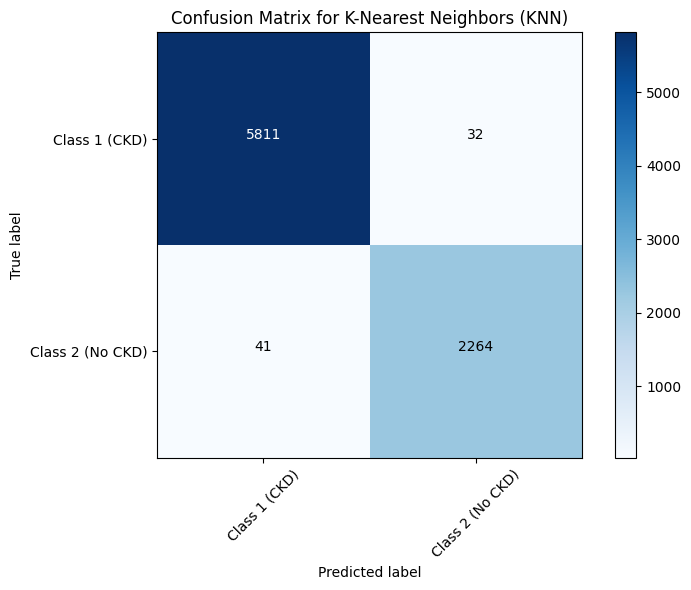

In [8]:
#Create the confusion matrix for KNN
knn_confusion_matrix = confusion_matrix(y_test, knn_pred)

#Plot the confusion matrix for KNN
plot_confusion_matrix(knn_confusion_matrix, class_names=['Class 1 (CKD)', 'Class 2 (No CKD)'], title="Confusion Matrix for K-Nearest Neighbors (KNN)")
plt.show()

***

### Logistic Regression

In [9]:
#initialise the logistic regression model
log_model = LogisticRegression()

#train the logistic regression model 
log_model.fit(X_train, y_train)

#predict the test values
log_pred = log_model.predict(X_test)

#evaluate the model
print(classification_report(y_test, log_pred))
print("Accuracy Score is: ", accuracy_score(y_test, log_pred))
print("Precision Score is: ", precision_score(y_test, log_pred))
print("Recall Score is: ", recall_score(y_test, log_pred))

              precision    recall  f1-score   support

           1       1.00      1.00      1.00      5843
           2       1.00      1.00      1.00      2305

    accuracy                           1.00      8148
   macro avg       1.00      1.00      1.00      8148
weighted avg       1.00      1.00      1.00      8148

Accuracy Score is:  1.0
Precision Score is:  1.0
Recall Score is:  1.0


c:\Users\MorpBorpAdmin\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


#### Confusion Matrix for Logistic Regression

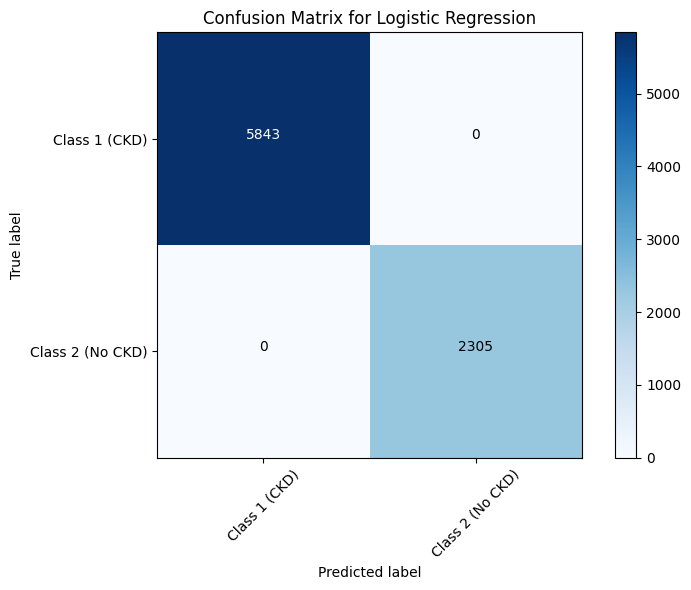

In [10]:
#Create the confusion matrix for Logistic Regression
log_confusion_matrix = confusion_matrix(y_test, log_pred)

#Plot the confusion matrix for Logistic Regression
plot_confusion_matrix(log_confusion_matrix, class_names=['Class 1 (CKD)', 'Class 2 (No CKD)'], title="Confusion Matrix for Logistic Regression")
plt.show()

***

### Gaussian Naïve Bayes

In [11]:
#initialise the Gaussian Naïve Bayes model
gnb_model = GaussianNB()

#train the Gaussian Naïve Bayes model
gnb_model.fit(X_train, y_train)

#predict the test values
gnb_pred = gnb_model.predict(X_test)

#evaluate the model
print(classification_report(y_test, gnb_pred))
print("Accuracy Score is: ", accuracy_score(y_test, gnb_pred))
print("Precision Score is: ", precision_score(y_test, gnb_pred))
print("Recall Score is: ", recall_score(y_test, gnb_pred))

              precision    recall  f1-score   support

           1       1.00      1.00      1.00      5843
           2       1.00      1.00      1.00      2305

    accuracy                           1.00      8148
   macro avg       1.00      1.00      1.00      8148
weighted avg       1.00      1.00      1.00      8148

Accuracy Score is:  1.0
Precision Score is:  1.0
Recall Score is:  1.0


#### Confusion Matrix for Gaussian Naïve Bayes

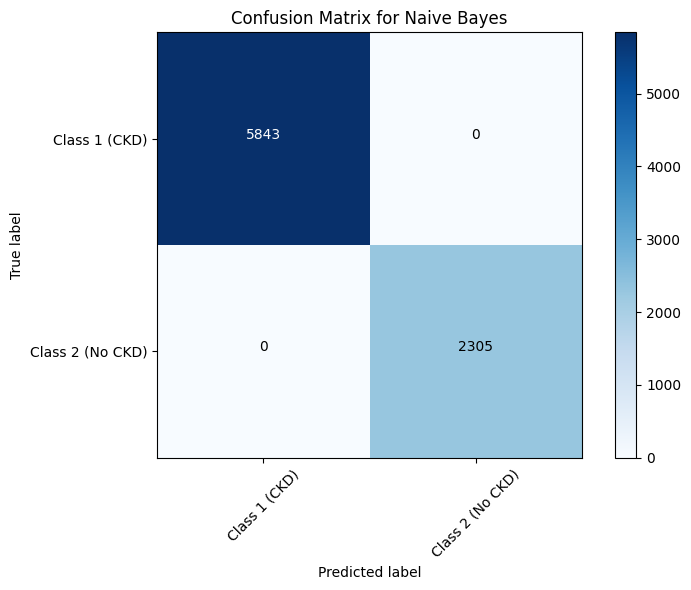

In [12]:
# Confusion matrix for Naive Bayes
gnb_confusion_matrix = confusion_matrix(y_test, gnb_pred)

# Plot the confusion matrix for Naive Bayes
plot_confusion_matrix(gnb_confusion_matrix, class_names=['Class 1 (CKD)', 'Class 2 (No CKD)'], title="Confusion Matrix for Naive Bayes")
plt.show()

***

### Support Vector Machine (SVM)

In [14]:
#initialise the SVM
svm_classifier = SVC(kernel = "linear", C = 0.3)

#cut the amount of datapoint to 5000
reduced_df = df[:5000]

#split the reduced_df to 70-30 ratio
redX_train, redX_test, redy_train, redy_test = train_test_split(reduced_df, reduced_df['Result'], test_size=0.30)

#train the SVM model
svm_classifier.fit(redX_train, redy_train)

#predict the test values
svm_pred = svm_classifier.predict(redX_test)

#evaluate the model
print(classification_report(redy_test, svm_pred))
print("Accuracy Score is: ", accuracy_score(redy_test, svm_pred))
print("Precision Score is: ", precision_score(redy_test, svm_pred))
print("Recall Score is: ", recall_score(redy_test, svm_pred))

              precision    recall  f1-score   support

           1       1.00      1.00      1.00      1070
           2       1.00      1.00      1.00       430

    accuracy                           1.00      1500
   macro avg       1.00      1.00      1.00      1500
weighted avg       1.00      1.00      1.00      1500

Accuracy Score is:  1.0
Precision Score is:  1.0
Recall Score is:  1.0


#### Confusion Matrix for SVM


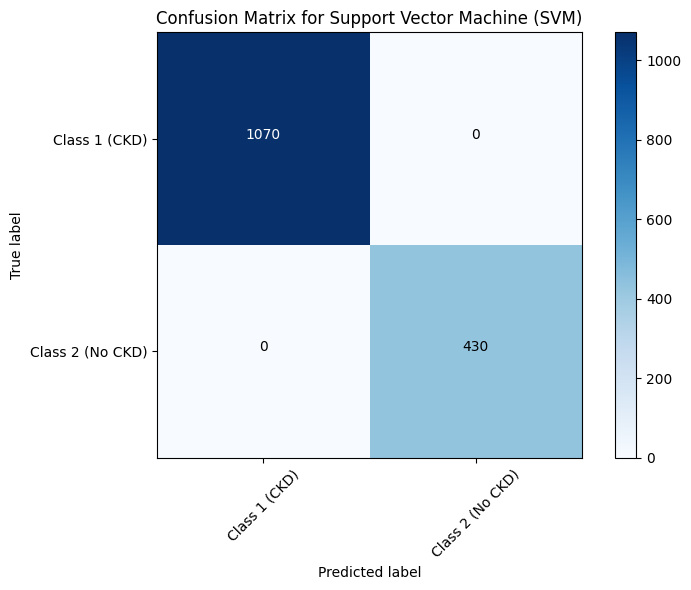

In [15]:
# Confusion matrix for Support Vector Machine (SVM)
svm_confusion_matrix = confusion_matrix(redy_test, svm_pred)

# Plot the confusion matrix for Support Vector Machine (SVM)
plot_confusion_matrix(svm_confusion_matrix, class_names=['Class 1 (CKD)', 'Class 2 (No CKD)'], title="Confusion Matrix for Support Vector Machine (SVM)")
plt.show()

***


### Ensemble


In [16]:
#initialise ensemble model
ensemble_model = VotingClassifier(
    estimators = [
        ("Logistic Regression", log_model),
        ("KNN", knn_model),
        ("GNB", gnb_model)
    ],
    voting = "soft"
)

#train the model
ensemble_model.fit(X_train, y_train)

#predict the test values
en_pred = ensemble_model.predict(X_test)

#evaluate the model
print(classification_report(y_test, en_pred))
print("Accuracy Score is: ", accuracy_score(y_test, en_pred))
print("Precision Score is: ", precision_score(y_test, en_pred))
print("Recall Score is: ", recall_score(y_test, en_pred))

              precision    recall  f1-score   support

           1       1.00      1.00      1.00      5798
           2       1.00      1.00      1.00      2350

    accuracy                           1.00      8148
   macro avg       1.00      1.00      1.00      8148
weighted avg       1.00      1.00      1.00      8148

Accuracy Score is:  1.0
Precision Score is:  1.0
Recall Score is:  1.0


c:\Users\MorpBorpAdmin\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


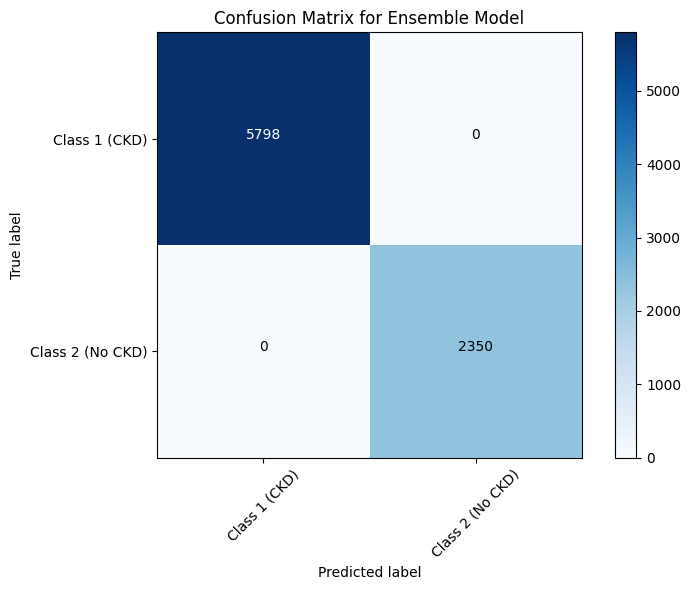

In [17]:
# Calculate the confusion matrix for the ensemble
ensemble_confusion_matrix = confusion_matrix(y_test, en_pred)

# Define class names if your target variable has specific class labels
class_names = ['Class 1 (CKD)', 'Class 2 (No CKD)']

# Plot the confusion matrix for the ensemble
plot_confusion_matrix(ensemble_confusion_matrix, class_names, title="Confusion Matrix for Ensemble Model")
plt.show()